# GIS 495 Final Project Connor Bonham

---

**Overview:**

In this project I will evaluate the correlation between:

* Streamflow vs Water Temperature
* Streamflow vs Elevation
* Streamflow vs Human Wealth

(I originally wanted to use suspended sedement and land use but there are 0 stations in north carolina which measure suspended sedement, and the tif file for land use was too big to push to github)


I will also present spatial data in an interactive StoryMaps using open source products. I will also host a live version of an HTML webpage on GitHub Pages.


---


This code was developed from `storymap.ipynb` of [this Github repository](https://github.com/mdgaines/leaflet_storymap_2023)

That code is adapted from the `index.html` file from [this GitHub repository](https://github.com/HandsOnDataViz/leaflet-map-simple).

That exercise is an adaptation of the ["Leaflet Storymaps with Google Sheets" tutorial](https://handsondataviz.org/leaflet-storymaps-with-google-sheets.html) from the *Hands-On Data Visualization* book by Jack Dougherty & Ilya Ilyankou. The open-acess web edition of the book can be found [here](https://handsondataviz.org/).

Dougherty and Ilyankou developed Leaflet Storymaps with Google Sheets to create an open-source, easily migratable, story map tool. 
I used Mollie D. Gaines's adaptation as a basis for this project.

In [1]:
import pandas as pd
import geopandas as gpd
import folium
import csv
import hydrofunctions as hf
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import rasterio as rio
import rioxarray as rxr
import os

# Narrative on the Rationale and Objective of the Work
Exploring the Dynamics of Streamflow: Unraveling Surprising Correlations

Introduction

The journey into the world of hydrology, specifically the intricate dance of streamflow and its correlations with various factors, has been a riveting expedition. As I embarked on this project, the initial scope was broad, with the intention of evaluating the multifaceted relationships that might exist within the realm of streamflow. However, as any scientific endeavor would demand, the need to narrow down the focus became apparent. Thus, the spotlight turned to three crucial variables – elevation, wealth, and water temperature. What ensued was a fascinating exploration filled with unexpected twists, humbling realizations, and the emergence of unexpected correlations.

Water Temperature: A Misjudged Variable

In the interest of time, I shall list my results in the beginning. I measured the correlation between streamflow and water temperature to be nearly nonexistant at a mere value of -.07. For the correlation of streamflow and Elevation I had the non surprising positive number of .335. Furthermore for a correlation between streamflow and Wealth, I was rather surprised by the similar value of .21.

The journey began with an assumption firmly rooted in the fundamental principles of chemistry – the expectation that warmer water would inherently flow faster. The logic seemed sound: molecules, when heated, tend to move more rapidly (Urone, 2020). This led to a conviction that warmer water would correlate strongly with increased streamflow. Yet, the data unfolded a narrative that challenged this assumption. As it turns out temperature has very little to do with the speed of water (Jackson, 2000). The correlation, or lack of it, between water temperature and streamflow was not as robust as anticipated, prompting a soul-searching moment. That my entire life had been spent without the realization that macroscopic behavior does not always mirror the microscopic realm I have been educated on. That principles I know to be true can be outweighed by the sheer magnitude of nature, it was upending. As it turns out the healthiest rivers are that which vary the least in temperature with wildlife support and canopy protection from sunrays (Moore, 1997). All this led to a recalibration of expectations and a deeper dive into the factors influencing streamflow.

The Influence of River Geometry

Amidst the ashes of disappointment with the water temperature correlation, the strongest contender emerged – the correlation between streamflow and elevation. The exploration of elevation as a variable offered a nuanced understanding of how topography impacts the dynamics of rivers. Rivers coursing through higher elevations, often cascading down hills, exhibited faster flow rates. This alignment with the laws of gravity presented a logical explanation for the observed correlation. Moreover, the impact of river geometry, such as bends, further emphasized that the intricate dance of water is choreographed by more than just thermal energy.

As the river meanders through the landscape, negotiating bends and twists, its velocity undergoes dynamic changes. The revelation that river geometry plays a pivotal role in influencing streamflow dynamics opened a Pandora's box of questions. How do bends influence flow rates, and what implications does this have for river ecosystems? Does the sinuosity of a river contribute to its overall health, and how can we leverage this understanding for sustainable water management? These questions beckon further investigation, hinting at the vast unexplored territories within the field of hydrology.

Atmospheric Conditions and Water Flow

Delving into the effects of atmospheric conditions at varying elevations added another layer of complexity to the study. The interplay between altitude and atmospheric pressure, temperature, and humidity became a captivating aspect of the research. Understanding how these factors influence water flow not only expanded the scope of the project but also underscored the importance of considering the broader environmental context in hydrological studies.

As the river descends from lofty peaks to lower elevations, it traverses diverse climatic zones. The changing atmospheric conditions, from thin air at higher elevations to denser air at lower altitudes, exert a profound influence on water (Desilver, 2015). The intricate dance between temperature, pressure, and humidity creates a symphony that orchestrates the rhythm of the river. Unraveling this symphony holds the key to a more comprehensive understanding of streamflow dynamics and provides insights into the resilience of aquatic ecosystems in the face of changing climatic conditions.

Wealth: An Unexpected Variable

Perhaps the most intriguing revelation of all was the unexpected correlation between wealth and streamflow. Initially considered as an outlier in the trio of variables, wealth surprised me with a subtle yet discernible connection. The realization that economic factors could play a role in streamflow dynamics raised intriguing questions. With a limited sample size, the correlation warrants further investigation. Exploring the socioeconomic implications on local hydrology could open new avenues for understanding the intricate relationship between human activities and natural systems.

The socio-economic landscape intertwines with the hydrological tapestry, creating a narrative that extends beyond the physical characteristics of rivers. Human activities, shaped by economic factors, influence the flow of rivers (Ye, 2003). There could thus be a reciprocal relationship between economic development and hydrological patterns. Which indubitably beckons a broader interdisciplinary approach, drawing from fields as diverse as economics, sociology, and environmental science.

Challenges and Reflections

The journey was not without its moments of frustration. The realization that the project fell short of initial expectations was a bitter pill to swallow. Hours of dedicated effort and meticulous analysis did not yield the anticipated comprehensive understanding. However, amidst the challenges, there was a silver lining – the discovery of an unexpected passion for programming. The satisfaction derived from coding echoed the gratification found in activities like cross-stitching and sudoku, revealing a harmonious intersection of logic, creativity, and problem-solving.

The challenges faced in this project serve as stepping stones rather than stumbling blocks. The intricate nature of hydrological systems demands a patient and persistent approach. The frustrations encountered paved the way for a deeper appreciation of the complexities inherent in studying natural phenomena. It became evident that the pursuit of scientific knowledge is often a dance between expectation and revelation, where each misstep offers an opportunity for growth and discovery.

Conclusion

In conclusion, this project, despite its deviations from initial expectations, offered a rich tapestry of insights into the complex dynamics of streamflow. From the underestimated role of water temperature to the surprising correlation with wealth, each twist and turn in the research journey contributed to a deeper understanding of the intricate interplay of factors shaping our natural world. As I conclude this chapter of exploration, I carry forward not just the data and results but a newfound appreciation for the unexpected and the resilience to navigate the complexities of scientific inquiry.

As the metaphorical river of knowledge continues to flow, it meanders through uncharted territories, inviting future explorers to delve deeper into the mysteries that the hydrological landscape holds. The journey may be long, and the path may twist and turn, but it is the relentless pursuit of understanding that propels us forward. The story of streamflow is far from over; it is a narrative that unfolds with each discovery, each hypothesis tested, and each correlation unraveled. And so, the scientific odyssey continues, fueled by curiosity, tempered by humility, and guided by the ever-present promise of discovery.





Works cited
Desilver, D. (2015, September 14). Does water’s boiling point change with altitude? Americans aren’t sure. Pew Research Center, p. 1.
Jackson, H. (2000, November 15). Rivers and Streams, and erosional processes. Retrieved from https://web.crc.losrios.edu/~jacksoh/lectures/rivers.html
Moore, J. A., & Miner, J. R. (1997, May 18). Stream Temperatures. Retrieved from file:///C:/Users/conno/Downloads/ec1489.pdf
Urone, P. P., & Hinrichs, R. (2020). 11.2 Heat, Specific Heat, and Heat Transfer. In Physics. Houston, Texas: OpenStax. Retrieved from https://openstax.org/books/physics/pages/11-2-heat-specific-heat-and-heat-transfer
Ye, B., Yang, D., and Kane, D. L. (2003), Changes in Lena River streamflow hydrology: Human impacts versus natural variations, Water Resour. Res., 39, 1200, doi:10.1029/2003WR001991, 7.


Creating Options CSV

In [2]:
# read in the options csv as a data frame
options_df = pd.read_csv('./csv/Options_Template.csv', index_col=0)

In [3]:
# Personalize Options via indexing
options_df['Customize']['Author Name'] = 'Connor Bonham'
options_df['Customize']['Author Github Repo Link'] = 'https://github.com/ConBonAon/FinalProject2023'
options_df['Customize']['Storymap Title'] = 'Bonham Final Project 2023'
options_df['Customize']['Storymap Subtitle'] = 'GIS 495, Connor Bonham'
options_df['Customize']['Author Email or Website'] = 'connorallenbon@gmail.com'
options_df['Customize']['Narrative Background Color'] = 'lightgray'
# save options as Options.csv
options_df.to_csv('./csv/Options.csv')

In [4]:
options_df.head()

,Customize,Hints
Setting,,
Storymap Info,NaN,"For help, see tutorial in [HandsOnDataViz.org]..."
Storymap Title,Bonham Final Project 2023,NaN
Storymap Subtitle,"GIS 495, Connor Bonham","Add your subtitle, or delete that portion"
Storymap Logo,media/ncsu_logo.jpg,Path to a logo image
Google Analytics Tracking ID,NaN,Sample format: UA-5488840-29


# Choosing Locations

## Locations
In North Carolina 37 USGS stations measure for water temperature.

![Temp](./imgs/Water_temp_stations.JPG)

2 are out of commission and 9 are seasonal.

![nonseasonal](./imgs/247Stations.JPG)

Which leaves 26 stations for data gathering.


[1](https://waterdata.usgs.gov/monitoring-location/0351706800/#parameterCode=00065&period=P7D&showMedian=true), [2](https://waterdata.usgs.gov/monitoring-location/03512000/#parameterCode=00065&period=P7D&showMedian=true), [3](https://waterdata.usgs.gov/monitoring-location/03460000/#parameterCode=00065&period=P7D&showMedian=true), [4](https://waterdata.usgs.gov/monitoring-location/03455500/#parameterCode=00065&period=P7D&showMedian=true), [5](https://waterdata.usgs.gov/monitoring-location/03456991/#parameterCode=00065&period=P7D&showMedian=true), [6](https://waterdata.usgs.gov/monitoring-location/03441000/#parameterCode=00065&period=P7D&showMedian=true), [7](https://waterdata.usgs.gov/monitoring-location/03446000/#parameterCode=00065&period=P7D&showMedian=true), [8](https://waterdata.usgs.gov/monitoring-location/03447687/#parameterCode=00065&period=P7D&showMedian=true), [9](https://waterdata.usgs.gov/monitoring-location/03447890/#parameterCode=00010&period=P7D&showMedian=true), [10](https://waterdata.usgs.gov/monitoring-location/03448050/#parameterCode=00010&period=P7D&showMedian=true), [11](https://waterdata.usgs.gov/monitoring-location/0344878100/#parameterCode=00065&period=P7D&showMedian=true), [12](https://waterdata.usgs.gov/monitoring-location/03451200/#parameterCode=00010&period=P7D&showMedian=true), [13](https://waterdata.usgs.gov/monitoring-location/03451500/#parameterCode=00065&period=P7D&showMedian=true), [14](https://waterdata.usgs.gov/monitoring-location/0344894205/#parameterCode=00065&period=P7D&showMedian=true), [15](https://waterdata.usgs.gov/monitoring-location/02137727/#parameterCode=00065&period=P7D&showMedian=true), [16](https://waterdata.usgs.gov/monitoring-location/02111000/#parameterCode=00065&period=P7D&showMedian=true), [17](https://waterdata.usgs.gov/monitoring-location/02101726/#parameterCode=00065&period=P7D&showMedian=true), [18](https://waterdata.usgs.gov/monitoring-location/02077200/#parameterCode=00065&period=P7D&showMedian=true), [19](https://waterdata.usgs.gov/monitoring-location/02077303/#parameterCode=00065&period=P7D&showMedian=true), [20](https://waterdata.usgs.gov/monitoring-location/02087182/#parameterCode=00010&period=P7D&showMedian=true), [21](https://waterdata.usgs.gov/monitoring-location/02102500/#parameterCode=00065&period=P7D&showMedian=true), [22](https://waterdata.usgs.gov/monitoring-location/02105769/#parameterCode=00065&period=P7D&showMedian=true), [23](https://waterdata.usgs.gov/monitoring-location/0208062765/#parameterCode=00065&period=P7D&showMedian=true), [24](https://waterdata.usgs.gov/monitoring-location/02081094/#parameterCode=00065&period=P7D&showMedian=true), [25](https://waterdata.usgs.gov/monitoring-location/0208114150/#parameterCode=00065&period=P7D&showMedian=true), [26](https://waterdata.usgs.gov/monitoring-location/0208458893/#parameterCode=00010&period=P7D&showMedian=true)

# Requesting Data from USGS

I requested 2022 daily data for all 26 locations assuming that they all measured both water temp and streamflow which turned out to be false.

In [5]:
# general objects
site_no = '0351706800,03512000,03460000,03455500,03456991,03441000,03446000,03447687,03447890,03448050,0344878100,03451200,03451500,0344894205,02137727,02111000,02101726,02077200,02077303,02087182,02102500,02105769,0208062765,02081094,0208114150,0208458893' #site no
service = 'dv'
st_date, end_date = '2022-01-01', '2023-01-01'

# flow in ft3/s
daily_mean = hf.NWIS(site=site_no, service=service, start_date=st_date, end_date=end_date)
# What are the properties of the dataset? You can see below that there are two types of data being collected at our site
daily_mean

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=0351706800%2C03512000%2C03460000%2C03455500%2C03456991%2C03441000%2C03446000%2C03447687%2C03447890%2C03448050%2C0344878100%2C03451200%2C03451500%2C0344894205%2C02137727%2C02111000%2C02101726%2C02077200%2C02077303%2C02087182%2C02102500%2C02105769%2C0208062765%2C02081094%2C0208114150%2C0208458893&startDT=2022-01-01&endDT=2023-01-01


USGS:02077200: HYCO CREEK NEAR LEASBURG, NC
    00010: <Day>  Temperature, water, degrees Celsius 
    00060: <Day>  Discharge, cubic feet per second 
    00065: <Day>  Gage height, feet 
USGS:02077303: HYCO R BL ABAY D NR MCGEHEES MILL, NC
    00010: <Day>  Temperature, water, degrees Celsius 
    00060: <Day>  Discharge, cubic feet per second 
    00065: <Day>  Gage height, feet 
USGS:0208062765: ROANOKE RIVER AT HALIFAX, NC
    00010: <Day>  Temperature, water, degrees Celsius 
    00065: <Day>  Gage height, feet 
    00095: <Day>  Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius 
    00300: <Day>  Dissolved oxygen, water, unfiltered, milligrams per liter 
    00400: <Day>  pH, water, unfiltered, field, standard units 
USGS:02081094: ROANOKE RIVER AT JAMESVILLE, NC
    00010: <Day>  Temperature, water, degrees Celsius 
    00065: <Day>  Gage height, feet 
    00095: <Day>  Specific conductance, water, unfiltered, microsiemens per centimeter 

In [6]:
daily_mean.df()
daily_mean.df().head()


,USGS:02077200:00010:00001,USGS:02077200:00010:00001_qualifiers,USGS:02077200:00010:00002,USGS:02077200:00010:00002_qualifiers,USGS:02077200:00010:00003,USGS:02077200:00010:00003_qualifiers,USGS:02077200:00060:00003,USGS:02077200:00060:00003_qualifiers,USGS:02077200:00065:00003,USGS:02077200:00065:00003_qualifiers,...,USGS:0351706800:00010:00002,USGS:0351706800:00010:00002_qualifiers,USGS:0351706800:00010:00003,USGS:0351706800:00010:00003_qualifiers,USGS:0351706800:00045:00006,USGS:0351706800:00045:00006_qualifiers,USGS:0351706800:00060:00003,USGS:0351706800:00060:00003_qualifiers,USGS:0351706800:00065:00003,USGS:0351706800:00065:00003_qualifiers
datetimeUTC,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00+00:00,16.6,A,14.0,A,15.1,A,3.06,A,23.66,A,...,12.4,A,13.3,A,0.21,A,132.0,A,2.97,A
2022-01-02 00:00:00+00:00,16.5,A,15.8,A,16.2,A,5.34,A,23.78,A,...,12.6,A,13.7,A,NaN,hf.missing,329.0,A,3.63,A
2022-01-03 00:00:00+00:00,15.8,A,8.4,A,11.5,A,194.00,A,26.38,A,...,7.4,A,8.9,A,NaN,hf.missing,289.0,A,3.55,A
2022-01-04 00:00:00+00:00,8.4,A,6.0,A,6.8,A,170.00,A,26.31,A,...,6.3,A,6.9,A,NaN,hf.missing,209.0,A,3.30,A
2022-01-05 00:00:00+00:00,7.3,A,5.5,A,6.3,A,52.70,A,24.94,A,...,6.8,A,7.5,A,NaN,hf.missing,185.0,A,3.21,A


In [7]:
streamflow_values = daily_mean.df('q')
streamflow_values

,USGS:02077200:00060:00003,USGS:02077303:00060:00003,USGS:02101726:00060:00003,USGS:02102500:00060:00003,USGS:02105769:00060:00003,USGS:02111000:00060:00003,USGS:02137727:00060:00003,USGS:03441000:00060:00003,USGS:03446000:00060:00003,USGS:03447687:00060:00003,USGS:0344878100:00060:00003,USGS:0344894205:00060:00003,USGS:03451500:00060:00003,USGS:03455500:00060:00003,USGS:03456991:00060:00003,USGS:03460000:00060:00003,USGS:03512000:00060:00003,USGS:0351706800:00060:00003
datetimeUTC,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00+00:00,3.06,3.57,3.61,853.0,1580.0,16.3,116.0,64.3,83.0,846.0,85.8,12.5,1070.0,44.9,157.0,70.4,398.0,132.0
2022-01-02 00:00:00+00:00,5.34,3.62,9.63,899.0,1990.0,34.6,175.0,135.0,144.0,1330.0,190.0,49.4,1620.0,162.0,410.0,477.0,1760.0,329.0
2022-01-03 00:00:00+00:00,194.00,4.83,1140.00,6830.0,3090.0,93.0,445.0,127.0,168.0,2180.0,329.0,54.6,2970.0,116.0,502.0,340.0,1300.0,289.0
2022-01-04 00:00:00+00:00,170.00,4.86,261.00,18100.0,6440.0,46.2,240.0,98.7,131.0,1740.0,172.0,37.4,2370.0,82.5,351.0,228.0,924.0,209.0
2022-01-05 00:00:00+00:00,52.70,4.31,71.80,18800.0,13100.0,32.2,185.0,87.0,115.0,1350.0,138.0,30.4,1760.0,72.6,298.0,179.0,754.0,185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 00:00:00+00:00,30.60,13.50,18.60,3940.0,5780.0,40.9,181.0,106.0,138.0,1250.0,85.3,20.6,1370.0,73.2,221.0,69.6,305.0,101.0
2022-12-29 00:00:00+00:00,25.90,13.40,16.00,3440.0,5280.0,39.8,177.0,105.0,134.0,1210.0,82.2,20.4,1330.0,75.7,219.0,66.7,296.0,102.0
2022-12-30 00:00:00+00:00,23.40,13.30,13.70,1690.0,4920.0,40.1,178.0,106.0,133.0,1200.0,82.5,21.0,1300.0,78.4,218.0,64.3,292.0,101.0


In [8]:
Watertemp_Values = daily_mean.df('00010')
Watertemp_Values.head()

,USGS:02077200:00010:00001,USGS:02077200:00010:00002,USGS:02077200:00010:00003,USGS:02077303:00010:00001,USGS:02077303:00010:00002,USGS:02077303:00010:00003,USGS:0208062765:00010:00001,USGS:0208062765:00010:00002,USGS:0208062765:00010:00003,USGS:02081094:00010:00001,...,USGS:03456991:00010:00003,USGS:03460000:00010:00001,USGS:03460000:00010:00002,USGS:03460000:00010:00003,USGS:03512000:00010:00001,USGS:03512000:00010:00002,USGS:03512000:00010:00003,USGS:0351706800:00010:00001,USGS:0351706800:00010:00002,USGS:0351706800:00010:00003
datetimeUTC,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00+00:00,16.6,14.0,15.1,12.4,11.0,11.7,12.9,11.5,12.0,13.4,...,11.6,12.8,10.2,11.6,13.4,11.0,11.9,14.5,12.4,13.3
2022-01-02 00:00:00+00:00,16.5,15.8,16.2,12.9,12.4,12.6,14.1,12.9,13.8,13.7,...,12.6,12.8,10.6,11.6,13.8,11.5,12.5,14.5,12.6,13.7
2022-01-03 00:00:00+00:00,15.8,8.4,11.5,13.3,11.0,11.7,14.2,10.4,12.6,13.9,...,8.9,10.6,5.9,7.8,11.5,6.5,8.9,12.6,7.4,8.9
2022-01-04 00:00:00+00:00,8.4,6.0,6.8,11.0,9.9,10.4,11.6,10.5,11.3,12.9,...,5.9,5.9,4.5,5.3,6.5,5.6,6.0,7.4,6.3,6.9
2022-01-05 00:00:00+00:00,7.3,5.5,6.3,10.0,9.7,9.9,11.1,10.2,10.5,12.4,...,6.1,6.6,5.1,5.7,7.2,5.2,6.1,8.4,6.8,7.5


In [9]:
#making watertemp values the mean version no the min or max
filtered_temp_columns = [col for col in Watertemp_Values.columns if '00003' in col]
Avg_Watertemp_Values = Watertemp_Values[filtered_temp_columns]
Avg_Watertemp_Values

,USGS:02077200:00010:00003,USGS:02077303:00010:00003,USGS:0208062765:00010:00003,USGS:02081094:00010:00003,USGS:0208458893:00010:00003,USGS:02087182:00010:00003,USGS:02101726:00010:00003,USGS:02111000:00010:00003,USGS:02137727:00010:00003,USGS:03446000:00010:00003,USGS:03447687:00010:00003,USGS:03447890:00010:00003,USGS:03448050:00010:00003,USGS:0344878100:00010:00003,USGS:03451200:00010:00003,USGS:03451500:00010:00003,USGS:03456991:00010:00003,USGS:03460000:00010:00003,USGS:03512000:00010:00003,USGS:0351706800:00010:00003
datetimeUTC,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00+00:00,15.1,11.7,12.0,12.8,16.8,13.3,12.5,12.6,12.0,11.9,13.2,13.2,13.2,11.9,12.8,12.8,11.6,11.6,11.9,13.3
2022-01-02 00:00:00+00:00,16.2,12.6,13.8,13.6,17.5,13.1,13.5,14.1,13.6,13.1,14.1,14.0,14.0,13.2,13.9,13.9,12.6,11.6,12.5,13.7
2022-01-03 00:00:00+00:00,11.5,11.7,12.6,13.6,15.8,12.2,12.5,9.8,11.1,9.5,11.5,11.3,11.5,9.6,11.3,11.0,8.9,7.8,8.9,8.9
2022-01-04 00:00:00+00:00,6.8,10.4,11.3,12.5,10.0,11.5,10.7,5.7,7.2,5.3,8.3,8.5,8.6,5.9,8.3,8.1,5.9,5.3,6.0,6.9
2022-01-05 00:00:00+00:00,6.3,9.9,10.5,11.9,10.1,11.4,9.8,5.7,6.7,5.3,7.3,7.4,7.5,5.7,7.3,7.2,6.1,5.7,6.1,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 00:00:00+00:00,1.4,5.2,6.5,5.5,2.8,7.4,3.2,1.7,2.4,1.2,2.1,1.8,1.9,0.4,1.6,1.7,1.3,-0.0,1.0,3.8
2022-12-29 00:00:00+00:00,2.1,5.5,6.6,5.4,4.2,7.3,3.5,2.6,3.0,2.2,3.0,2.8,2.8,1.9,2.5,2.5,2.4,0.7,2.9,5.1
2022-12-30 00:00:00+00:00,3.6,5.8,6.8,5.6,5.5,7.2,4.0,3.8,4.3,3.4,4.2,3.9,3.9,3.5,3.7,3.7,3.2,2.8,4.1,6.6


20 locations have avg temp, 18 have avg streamflow. 

In [10]:
potential_locations = ["0351706800", "03512000", "03460000", "03455500", "03456991", "03441000", "03446000",
                       "03447687", "03447890", "03448050", "0344878100", "03451200", "03451500", "0344894205",
                       "02137727", "02111000", "02101726", "02077200", "02077303", "02087182", "02102500",
                       "02105769", "0208062765", "02081094", "0208114150", "0208458893"]
# Extract location numbers from both datasets
streamflow_locations = [col.split(":")[1] for col in streamflow_values.columns if 'USGS:' in col and '00060' in col]
watertemp_locations = [col.split(":")[1] for col in Avg_Watertemp_Values.columns if 'USGS:' in col and '00010' in col]

# Find common locations in both datasets
common_locations = set(streamflow_locations).intersection(watertemp_locations)

# Construct column names for the common locations in both datasets
filtered_streamflow_columns = ['USGS:' + loc + ':00060:00003' for loc in common_locations]
filtered_watertemp_columns = ['USGS:' + loc + ':00010:00003' for loc in common_locations]

# Filter columns in both datasets based on the common locations
filtered_streamflow_df = streamflow_values[filtered_streamflow_columns]
filtered_watertemp_df = Avg_Watertemp_Values[filtered_watertemp_columns]



In [11]:
# Display the resulting DataFrames
filtered_streamflow_df

,USGS:02137727:00060:00003,USGS:03447687:00060:00003,USGS:0344878100:00060:00003,USGS:02077200:00060:00003,USGS:03446000:00060:00003,USGS:03456991:00060:00003,USGS:02077303:00060:00003,USGS:0351706800:00060:00003,USGS:02111000:00060:00003,USGS:02101726:00060:00003,USGS:03512000:00060:00003,USGS:03460000:00060:00003,USGS:03451500:00060:00003
datetimeUTC,,,,,,,,,,,,,
2022-01-01 00:00:00+00:00,116.0,846.0,85.8,3.06,83.0,157.0,3.57,132.0,16.3,3.61,398.0,70.4,1070.0
2022-01-02 00:00:00+00:00,175.0,1330.0,190.0,5.34,144.0,410.0,3.62,329.0,34.6,9.63,1760.0,477.0,1620.0
2022-01-03 00:00:00+00:00,445.0,2180.0,329.0,194.00,168.0,502.0,4.83,289.0,93.0,1140.00,1300.0,340.0,2970.0
2022-01-04 00:00:00+00:00,240.0,1740.0,172.0,170.00,131.0,351.0,4.86,209.0,46.2,261.00,924.0,228.0,2370.0
2022-01-05 00:00:00+00:00,185.0,1350.0,138.0,52.70,115.0,298.0,4.31,185.0,32.2,71.80,754.0,179.0,1760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 00:00:00+00:00,181.0,1250.0,85.3,30.60,138.0,221.0,13.50,101.0,40.9,18.60,305.0,69.6,1370.0
2022-12-29 00:00:00+00:00,177.0,1210.0,82.2,25.90,134.0,219.0,13.40,102.0,39.8,16.00,296.0,66.7,1330.0
2022-12-30 00:00:00+00:00,178.0,1200.0,82.5,23.40,133.0,218.0,13.30,101.0,40.1,13.70,292.0,64.3,1300.0


In [12]:
filtered_watertemp_df

,USGS:02137727:00010:00003,USGS:03447687:00010:00003,USGS:0344878100:00010:00003,USGS:02077200:00010:00003,USGS:03446000:00010:00003,USGS:03456991:00010:00003,USGS:02077303:00010:00003,USGS:0351706800:00010:00003,USGS:02111000:00010:00003,USGS:02101726:00010:00003,USGS:03512000:00010:00003,USGS:03460000:00010:00003,USGS:03451500:00010:00003
datetimeUTC,,,,,,,,,,,,,
2022-01-01 00:00:00+00:00,12.0,13.2,11.9,15.1,11.9,11.6,11.7,13.3,12.6,12.5,11.9,11.6,12.8
2022-01-02 00:00:00+00:00,13.6,14.1,13.2,16.2,13.1,12.6,12.6,13.7,14.1,13.5,12.5,11.6,13.9
2022-01-03 00:00:00+00:00,11.1,11.5,9.6,11.5,9.5,8.9,11.7,8.9,9.8,12.5,8.9,7.8,11.0
2022-01-04 00:00:00+00:00,7.2,8.3,5.9,6.8,5.3,5.9,10.4,6.9,5.7,10.7,6.0,5.3,8.1
2022-01-05 00:00:00+00:00,6.7,7.3,5.7,6.3,5.3,6.1,9.9,7.5,5.7,9.8,6.1,5.7,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28 00:00:00+00:00,2.4,2.1,0.4,1.4,1.2,1.3,5.2,3.8,1.7,3.2,1.0,-0.0,1.7
2022-12-29 00:00:00+00:00,3.0,3.0,1.9,2.1,2.2,2.4,5.5,5.1,2.6,3.5,2.9,0.7,2.5
2022-12-30 00:00:00+00:00,4.3,4.2,3.5,3.6,3.4,3.2,5.8,6.6,3.8,4.0,4.1,2.8,3.7


I now have 13 locations where both variables are measured. I want to rename the columns to the same thing so I can compare them by column.

In [13]:
#cutting out USGS: from column names
filtered_streamflow_df.columns = filtered_streamflow_df.columns.str[5:]
filtered_watertemp_df.columns = filtered_watertemp_df.columns.str[5:]




In [14]:
#cutting out :000X0:00003 from column names
filtered_streamflow_df.columns = filtered_streamflow_df.columns.str[:-12]
filtered_watertemp_df.columns = filtered_watertemp_df.columns.str[:-12]

# Streamflow vs Water corrcoefs for each location

In [15]:
# Extract the common column names
common_columns = set(filtered_streamflow_df.columns) & set(filtered_watertemp_df.columns)

# Initialize an empty list to store DataFrames
corrcoef_stmflw_wtrtmp_df = []

# Compute the correlation coefficient for each common column
for column in common_columns:
    data1_column = filtered_streamflow_df[column].values
    data2_column = filtered_watertemp_df[column].values

    correlation_coefficient = np.corrcoef(data1_column, data2_column)[0, 1]

    # Create a temporary DataFrame for each iteration
    temp_df = pd.DataFrame({"Location": [column], "Correlation Coefficient": [correlation_coefficient]})
    
    # Append the temporary DataFrame to the list
    corrcoef_stmflw_wtrtmp_df.append(temp_df)

    print(f"Correlation coefficient for USGS location '{column}' = {correlation_coefficient}")

# Concatenate the list of DataFrames into a single DataFrame
corrcoef_stmflw_wtrtmp_df = pd.concat(corrcoef_stmflw_wtrtmp_df, ignore_index=True)


Correlation coefficient for USGS location '02137727' = -0.1205493623903371
Correlation coefficient for USGS location '03447687' = -0.05626917624481335
Correlation coefficient for USGS location '0344878100' = nan
Correlation coefficient for USGS location '02077200' = nan
Correlation coefficient for USGS location '03446000' = -0.006663145379915638
Correlation coefficient for USGS location '03456991' = nan
Correlation coefficient for USGS location '02077303' = -0.13350953287047415
Correlation coefficient for USGS location '0351706800' = -0.11225280087809647
Correlation coefficient for USGS location '02111000' = -0.09153856543663072
Correlation coefficient for USGS location '02101726' = -0.15057422849004087
Correlation coefficient for USGS location '03512000' = nan
Correlation coefficient for USGS location '03460000' = -0.18623982827422705
Correlation coefficient for USGS location '03451500' = -0.07493103512086549


In [16]:
# Print the resulting DataFrame
print(corrcoef_stmflw_wtrtmp_df)


      Location  Correlation Coefficient
0     02137727                -0.120549
1     03447687                -0.056269
2   0344878100                      NaN
3     02077200                      NaN
4     03446000                -0.006663
5     03456991                      NaN
6     02077303                -0.133510
7   0351706800                -0.112253
8     02111000                -0.091539
9     02101726                -0.150574
10    03512000                      NaN
11    03460000                -0.186240
12    03451500                -0.074931


In [17]:
corrcoef_stmflw_wtrtmp_df.to_csv('./csv/corrcoef_stmflw_wtrtmp_df.csv')

The average corrcoef for streamflow vs water temp is -0.1 

![excproof](./imgs/Avg_corcoef_st_tmp.JPG)

In [18]:
print(common_locations)

{'02137727', '03447687', '0344878100', '02077200', '03446000', '03456991', '02077303', '0351706800', '02111000', '02101726', '03512000', '03460000', '03451500'}


In [19]:
com_loc = "'03447687', '03446000', '02077200', '03451500', '03456991', '03512000', '0344878100', '02137727', '02111000', '02077303', '0351706800', '03460000', '02101726'"

# Replace single quotes with an empty string
com_loc_mod = com_loc.replace("'", "")

print(com_loc_mod)

03447687, 03446000, 02077200, 03451500, 03456991, 03512000, 0344878100, 02137727, 02111000, 02077303, 0351706800, 03460000, 02101726


Alright so the locations I am going to compare are '03447687', '03446000', '02077200', '03451500', '03456991', '03512000', '0344878100', '02137727', '02111000', '02077303', '0351706800', '03460000', '02101726' and I want to get geospacial data for these locations. 

# Accumulating annual data

In [21]:
Com_Loc_df = []

for column in common_columns:
    output = hf.site_file(column)
    site_table = output.table
    latitude = site_table['dec_lat_va'].iloc[0]  
    longitude = site_table['dec_long_va'].iloc[0]
    datum = site_table['dec_coord_datum_cd'].iloc[0]
    alt_land_surf = site_table['alt_va'].iloc[0]
    county = site_table['county_cd'].iloc[0]
    temp_df = pd.DataFrame({"Location": [column], "Lat": [latitude],"Long":[longitude], "Datum":[datum], "County":[county], "Elevation":[alt_land_surf]})
    Com_Loc_df.append(temp_df)
Com_Loc_df = pd.concat(Com_Loc_df, ignore_index=True)
Com_Loc_df

Retrieved the site file for site #02137727 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=02137727&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #03447687 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=03447687&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #0344878100 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=0344878100&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #02077200 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=02077200&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #03446000 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=03446000&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #03456991 from https://waterservices.usgs.gov/nwis/site/?format=rdb&sites=03456991&siteOutput=expanded&siteStatus=alll
Retrieved the site file for site #02077303 from https://waterservices.usgs.gov/nwis/

,Location,Lat,Long,Datum,County,Elevation
0,02137727,35.685833,-82.060278,NAD83,111,1233.81
1,03447687,35.429167,-82.552500,NAD83,89,2032.76
2,0344878100,35.561389,-82.596944,NAD83,21,1975.32
3,02077200,36.397778,-79.196667,NAD83,33,399.30
4,03446000,35.398056,-82.595000,NAD83,89,2088.39
5,03456991,35.521944,-82.848056,NAD83,87,2581.60
6,02077303,36.522722,-78.997056,NAD83,145,341.97
7,0351706800,35.438333,-83.918889,NAD83,75,1271.70
8,02111000,35.990833,-81.558333,NAD83,27,1211.30
9,02101726,35.735141,-79.423075,NAD83,37,482.90


In [22]:
County_codes = pd.read_csv('./data/County_codes.csv')
County_codes


,County,Name
0,1,Alamance County
1,3,Alexander County
2,5,Alleghany County
3,7,Anson County
4,9,Ashe County
...,...,...
95,191,Wayne County
96,193,Wilkes County
97,195,Wilson County
98,197,Yadkin County


In [23]:

# Merge the datasets on 'county_code'
Com_Loc_County = pd.merge(Com_Loc_df, County_codes, on='County', how='left')

# Display the result
Com_Loc_County

,Location,Lat,Long,Datum,County,Elevation,Name
0,02137727,35.685833,-82.060278,NAD83,111,1233.81,Mcdowell County
1,03447687,35.429167,-82.552500,NAD83,89,2032.76,Henderson County
2,0344878100,35.561389,-82.596944,NAD83,21,1975.32,Buncombe County
3,02077200,36.397778,-79.196667,NAD83,33,399.30,Caswell County
4,03446000,35.398056,-82.595000,NAD83,89,2088.39,Henderson County
5,03456991,35.521944,-82.848056,NAD83,87,2581.60,Haywood County
6,02077303,36.522722,-78.997056,NAD83,145,341.97,Person County
7,0351706800,35.438333,-83.918889,NAD83,75,1271.70,Graham County
8,02111000,35.990833,-81.558333,NAD83,27,1211.30,Caldwell County
9,02101726,35.735141,-79.423075,NAD83,37,482.90,Chatham County


Since the Land cover map is from 2019 I want to grab streamflow data from 2019 to compare it to. I will use the same 13 stations from before for simplicity.

In [24]:
Strmflw_an = []
temp_df = pd.DataFrame(columns=["Location", "Year", "Streamflow"])  # Initialize outside the loop

for column in common_columns:
    output = hf.stats(column, 'annual', missingData='on')
    site_table = output.table
    
    # Filter rows where parameter_cd is '00060' and year_nu is 2019
    filtered_table = site_table.loc[(site_table['parameter_cd'] == '00060') & (site_table['year_nu'] == 2019)]
    
    # Check if there are rows in the filtered_table
    if not filtered_table.empty:
        year = filtered_table['year_nu'].iloc[0]
        stmflw = filtered_table['mean_va'].iloc[0]
        
        # Append the data for the current iteration to temp_df
        temp_df = pd.concat([temp_df, pd.DataFrame({"Location": [column], "Year": [year], "Streamflow": [stmflw]})], ignore_index=True)
    else:
        print(f"No data for {column}")

# final DataFrame
Strmflw_an = temp_df
print(Strmflw_an)


Retrieved annual statistics for site #02137727 from https://waterservices.usgs.gov/nwis/stat//


C:\Users\conno\AppData\Local\Temp\ipykernel_21116\1450280576.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  temp_df = pd.concat([temp_df, pd.DataFrame({"Location": [column], "Year": [year], "Streamflow": [stmflw]})], ignore_index=True)


Retrieved annual statistics for site #03447687 from https://waterservices.usgs.gov/nwis/stat/
Retrieved annual statistics for site #0344878100 from https://waterservices.usgs.gov/nwis/stat//
Retrieved annual statistics for site #02077200 from https://waterservices.usgs.gov/nwis/stat//
Retrieved annual statistics for site #03446000 from https://waterservices.usgs.gov/nwis/stat//
Retrieved annual statistics for site #03456991 from https://waterservices.usgs.gov/nwis/stat//
Retrieved annual statistics for site #02077303 from https://waterservices.usgs.gov/nwis/stat//
Retrieved annual statistics for site #0351706800 from https://waterservices.usgs.gov/nwis/stat//
Retrieved annual statistics for site #02111000 from https://waterservices.usgs.gov/nwis/stat//
Retrieved annual statistics for site #02101726 from https://waterservices.usgs.gov/nwis/stat//
Retrieved annual statistics for site #03512000 from https://waterservices.usgs.gov/nwis/stat//
Retrieved annual statistics for site #03460000 

With this annual streamflow I can look at how each locations streamflow compared to their elevation via a corrcoef.

# Streamflow vs Elevation Corrcoef single

In [25]:
# Assuming Strmflw_an = df1 is the first dataset and Com_Loc_County = df2 is the second dataset
# with 'Location' as the common column
# 'Streamflow' is the column in df1, and 'Elevation' is the column in df2

# Merge the two datasets on the 'locations' column
Elv_stmfl_df = pd.merge(Strmflw_an, Com_Loc_County, on='Location', how='inner')

# Calculate the correlation coefficient
corrcoeff_Elv_stmfl = np.corrcoef(Elv_stmfl_df['Streamflow'], Elv_stmfl_df['Elevation'])[0, 1]

corrcoeff_Elv_stmfl


0.3354364677465479

In [26]:
Elv_stmfl_df

,Location,Year,Streamflow,Lat,Long,Datum,County,Elevation,Name
0,02137727,2019,368.8,35.685833,-82.060278,NAD83,111,1233.81,Mcdowell County
1,03447687,2019,2424.0,35.429167,-82.552500,NAD83,89,2032.76,Henderson County
2,0344878100,2019,116.1,35.561389,-82.596944,NAD83,21,1975.32,Buncombe County
3,02077200,2019,61.4,36.397778,-79.196667,NAD83,33,399.30,Caswell County
4,03446000,2019,236.3,35.398056,-82.595000,NAD83,89,2088.39,Henderson County
5,03456991,2019,440.3,35.521944,-82.848056,NAD83,87,2581.60,Haywood County
6,02077303,2019,178.4,36.522722,-78.997056,NAD83,145,341.97,Person County
7,0351706800,2019,363.6,35.438333,-83.918889,NAD83,75,1271.70,Graham County
8,02111000,2019,76.7,35.990833,-81.558333,NAD83,27,1211.30,Caldwell County
9,02101726,2019,87.2,35.735141,-79.423075,NAD83,37,482.90,Chatham County


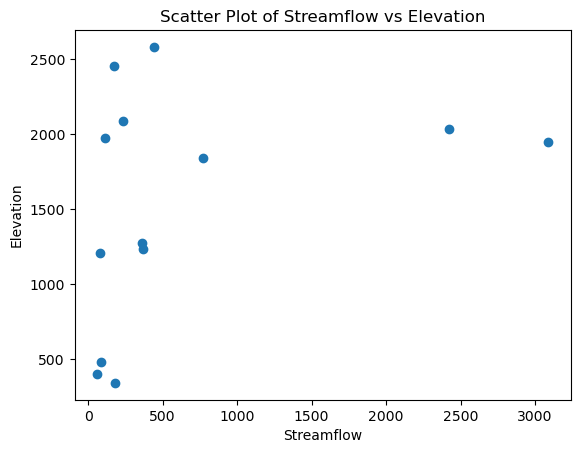

In [27]:
plt.scatter(Elv_stmfl_df['Streamflow'], Elv_stmfl_df['Elevation'])
plt.title('Scatter Plot of Streamflow vs Elevation')
plt.xlabel('Streamflow')
plt.ylabel('Elevation')
plt.show()

When I went to push the code for reading in the land use map, it would not let me push it to git because the tif file was too large. So I abandoned that aspect of the project.

### Chapters

We will add content to our map by creating a `Chapters.csv`.

However, first we will look through our data to get the information we are interested in.

Now, let's read in some of our spatial data.

We can use the `folium` package to see what our Leaflet map will look like.

# Map making

In [28]:
# Create a map centered at the mean latitude and longitude
map_center = [Com_Loc_df['Lat'].mean(), Com_Loc_df['Long'].mean()]
loc_map = folium.Map(location=map_center, zoom_start=10)

# Add markers for each location
for index, row in Com_Loc_df.iterrows():
    folium.Marker([row['Lat'], row['Long']], popup=row['Location']).add_to(loc_map)

# Save the map as an HTML file or display it in a Jupyter notebook
map_file_name='loc_map.html'

if not os.path.exists(map_file_name):
    # Save the map as an HTML file
    loc_map.save(map_file_name)
    print(f"Map saved as {map_file_name}")
else:
    print(f"A map file named {map_file_name} already exists. Not saving a new map.")
loc_map

A map file named loc_map.html already exists. Not saving a new map.


In [29]:

header = ['Chapter', 'Media Link', 'Media Credit', 'Media Credit Link', 'Description', \
    'Zoom', 'Marker', 'Marker Color', 'Location', 'Latitude', 'Longitude', 'Overlay', 'Overlay Transparency', \
    'GeoJSON Overlay', 'GeoJSON Feature Properties']



In [30]:
# Create a new Chapters.csv

# opens a csv file in write mode
# the with statement makes sure the file closes properly when we're done
with open('./csv/Chapters.csv', 'w', newline='') as options:
    # create the csv writer
    writer = csv.writer(options)

    # write a row to the csv file
    writer.writerow(header)

    writer.writerow(['Title'])

    for column in common_columns:
        writer.writerow([column])

In [31]:
chapter_df = pd.read_csv('./csv/Chapters.csv')
chapter_df

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02137727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03447687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0344878100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02077200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,03446000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,03456991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,02077303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0351706800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,02111000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Our first chapter will give a brief overview of Raleigh. We will include a fun skyline image with a link to where we got the image (the Raleigh government webpage). Our map will show a historical, georeferenced map of the Raleigh City Plan from 1834 along with blue markers for each of the 8 schools we will look at for chapters.

To include images in our narative, we need to have them downloaded to our `media` directory.

In [32]:
chapter_df.columns

Index(['Chapter', 'Media Link', 'Media Credit', 'Media Credit Link',
       'Description', 'Zoom', 'Marker', 'Marker Color', 'Location', 'Latitude',
       'Longitude', 'Overlay', 'Overlay Transparency', 'GeoJSON Overlay',
       'GeoJSON Feature Properties'],
      dtype='object')

In [33]:
# path to the image used for this chapter
chapter_df.loc[[0], ['Media Link']] = 'media/cat0.jpg'
# Name of image source
chapter_df.loc[[0], ['Media Credit']] = 'Source: katya-guseva0'
# Link to image
chapter_df.loc[[0], ['Media Credit Link']] = 'https://pixabay.com/photos/cat-sleeping-cat-feline-pet-animal-2605502/,https://tenor.com/view/hello-wave-cute-anime-cartoon-gif-15982745'
# Narrative description
chapter_df.loc[[0], ['Description']] = 'This is my final project for GIS 495'
# Zoom level
chapter_df.loc[[0], ['Zoom']] = 15.75
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[0], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[0], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[0], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[0], ['Latitude']] = 35.7796
chapter_df.loc[[0], ['Longitude']] = -78.6382
# If you want to add an overlay of an old map you can search for a georeferenced map at
# mapwraper.net
# add the link to the map in the Overlay section 
chapter_df.loc[[0], ['Overlay']] = 'NaN'
# Set how transparent you want the Overlay image/map to be
chapter_df.loc[[0], ['Overlay Transparency']] = 0.9


C:\Users\conno\AppData\Local\Temp\ipykernel_21116\998395368.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'media/cat0.jpg' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  chapter_df.loc[[0], ['Media Link']] = 'media/cat0.jpg'
C:\Users\conno\AppData\Local\Temp\ipykernel_21116\998395368.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Source: katya-guseva0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  chapter_df.loc[[0], ['Media Credit']] = 'Source: katya-guseva0'
C:\Users\conno\AppData\Local\Temp\ipykernel_21116\998395368.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'https://pixabay.com/photos/cat-sleeping-cat-feline-pet-animal-2605502/,https://tenor.com/view/hello-wave-cut

In [34]:
chapter_df

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties
0,Title,media/cat0.jpg,Source: katya-guseva0,https://pixabay.com/photos/cat-sleeping-cat-fe...,This is my final project for GIS 495,15.75,Hidden,,"Raleigh, NC",35.7796,-78.6382,NaN,0.9,NaN,NaN
1,02137727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03447687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0344878100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02077200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,03446000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,03456991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,02077303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0351706800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,02111000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
Elv_stmfl_df

,Location,Year,Streamflow,Lat,Long,Datum,County,Elevation,Name
0,02137727,2019,368.8,35.685833,-82.060278,NAD83,111,1233.81,Mcdowell County
1,03447687,2019,2424.0,35.429167,-82.552500,NAD83,89,2032.76,Henderson County
2,0344878100,2019,116.1,35.561389,-82.596944,NAD83,21,1975.32,Buncombe County
3,02077200,2019,61.4,36.397778,-79.196667,NAD83,33,399.30,Caswell County
4,03446000,2019,236.3,35.398056,-82.595000,NAD83,89,2088.39,Henderson County
5,03456991,2019,440.3,35.521944,-82.848056,NAD83,87,2581.60,Haywood County
6,02077303,2019,178.4,36.522722,-78.997056,NAD83,145,341.97,Person County
7,0351706800,2019,363.6,35.438333,-83.918889,NAD83,75,1271.70,Graham County
8,02111000,2019,76.7,35.990833,-81.558333,NAD83,27,1211.30,Caldwell County
9,02101726,2019,87.2,35.735141,-79.423075,NAD83,37,482.90,Chatham County


In [36]:
for i in Elv_stmfl_df.index:
    # print(nc_coll_raleigh.iloc[i])
    location = Elv_stmfl_df.loc[[i], ['Location']].values[0][0].title()
    lat = Elv_stmfl_df.loc[[i], ['Lat']].values[0][0]
    lon = Elv_stmfl_df.loc[[i], ['Long']].values[0][0]
    alt = Elv_stmfl_df.loc[[i], ['Elevation']].values[0][0]

    chapter_df.loc[chapter_df['Chapter'] == location, 'Latitude'] = lat
    chapter_df.loc[chapter_df['Chapter'] == location, 'Longitude'] = lon
    chapter_df.loc[chapter_df['Chapter'] == location, 'Elevation'] = alt

    chapter_df.loc[chapter_df['Chapter'] == location, 'Zoom'] = 16
    chapter_df.loc[chapter_df['Chapter'] == location, 'Marker'] = 'Plain'
    chapter_df.loc[chapter_df['Chapter'] == location, 'Marker Color'] = 'blue'

chapter_df


,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties,Elevation
0,Title,media/cat0.jpg,Source: katya-guseva0,https://pixabay.com/photos/cat-sleeping-cat-fe...,This is my final project for GIS 495,15.75,Hidden,,"Raleigh, NC",35.779600,-78.638200,NaN,0.9,NaN,NaN,NaN
1,02137727,NaN,NaN,NaN,NaN,16.00,Plain,blue,NaN,35.685833,-82.060278,NaN,NaN,NaN,NaN,1233.81
2,03447687,NaN,NaN,NaN,NaN,16.00,Plain,blue,NaN,35.429167,-82.552500,NaN,NaN,NaN,NaN,2032.76
3,0344878100,NaN,NaN,NaN,NaN,16.00,Plain,blue,NaN,35.561389,-82.596944,NaN,NaN,NaN,NaN,1975.32
4,02077200,NaN,NaN,NaN,NaN,16.00,Plain,blue,NaN,36.397778,-79.196667,NaN,NaN,NaN,NaN,399.30
5,03446000,NaN,NaN,NaN,NaN,16.00,Plain,blue,NaN,35.398056,-82.595000,NaN,NaN,NaN,NaN,2088.39
6,03456991,NaN,NaN,NaN,NaN,16.00,Plain,blue,NaN,35.521944,-82.848056,NaN,NaN,NaN,NaN,2581.60
7,02077303,NaN,NaN,NaN,NaN,16.00,Plain,blue,NaN,36.522722,-78.997056,NaN,NaN,NaN,NaN,341.97
8,0351706800,NaN,NaN,NaN,NaN,16.00,Plain,blue,NaN,35.438333,-83.918889,NaN,NaN,NaN,NaN,1271.70
9,02111000,NaN,NaN,NaN,NaN,16.00,Plain,blue,NaN,35.990833,-81.558333,NaN,NaN,NaN,NaN,1211.30


Now, let's save this to a CSV and see how this changes our storymap.

In [37]:
chapter_df.to_csv('./csv/Chapters.csv')

We have a map! We also have some images, links, and narrative text appearing.

Now, let's add a new image and image source information for Peace College.

In [38]:
# Add an image for our first Chapter
chapter_df.loc[1, "Media Link"] = "media/cat1.jpg"

# add source name
chapter_df.loc[1, "Media Credit"] = "Image Source: Katzenspielzeug"

# add the source link
chapter_df.loc[1, "Media Credit Link"] = "https://pixabay.com/photos/cat-pet-animal-tabby-cat-98359/"

In [39]:
chapter_df.loc[2, "Media Link"] = "media/cat2.jpg"
chapter_df.loc[3, "Media Link"] = "media/cat3.jpg"
chapter_df.loc[4, "Media Link"] = "media/cat4.jpg"
chapter_df.loc[5, "Media Link"] = "media/cat5.jpg"
chapter_df.loc[6, "Media Link"] = "media/cat6.jpg"
chapter_df.loc[7, "Media Link"] = "media/cat7.jpg"
chapter_df.loc[8, "Media Link"] = "media/cat8.jpg"
chapter_df.loc[9, "Media Link"] = "media/cat9.jpg"
chapter_df.loc[10, "Media Link"] = "media/cat10.jpg"
chapter_df.loc[11, "Media Link"] = "media/cat11.jpg"
chapter_df.loc[12, "Media Link"] = "media/cat12.jpg"

In [40]:
chapter_df.loc[2, "Media Credit"] = "Image Source: ClaudiaWollesen"
chapter_df.loc[3, "Media Credit"] = "Image Source: DanaTentis"
chapter_df.loc[4, "Media Credit"] = "Image Source: MelaniMarfeld"
chapter_df.loc[5, "Media Credit"] = "Image Source: laurenta_photography"
chapter_df.loc[6, "Media Credit"] = "Image Source: Sophkins"
chapter_df.loc[7, "Media Credit"] = "Image Source: eduardovieiraphoto"
chapter_df.loc[8, "Media Credit"] = "Image Source: MolnarSzabolcsErdely"
chapter_df.loc[9, "Media Credit"] = "Image Source: luxstorm"
chapter_df.loc[10, "Media Credit"] = "Image Source: bambi2192"
chapter_df.loc[11, "Media Credit"] = "Image Source: Netti_Nu_Nu"
chapter_df.loc[12, "Media Credit"] = "Image Source: alektas"

In [41]:
chapter_df.loc[2, "Media Credit Link"] = "https://pixabay.com/photos/maine-coon-cat-cats-eyes-black-cat-694730/"
chapter_df.loc[3, "Media Credit Link"] = "https://pixabay.com/photos/kitten-asleep-in-a-pot-1995961/"
chapter_df.loc[4, "Media Credit Link"] = "https://pixabay.com/photos/british-shorthair-cat-pet-kitten-6815375/"
chapter_df.loc[5, "Media Credit Link"] = "https://pixabay.com/photos/cat-grass-green-nature-beast-7245850/"
chapter_df.loc[6, "Media Credit Link"] = "https://pixabay.com/photos/cat-animal-pet-kitty-scottish-fold-2310384/"
chapter_df.loc[7, "Media Credit Link"] = "https://pixabay.com/photos/cat-kitten-pet-black-cat-kitty-5233986/"
chapter_df.loc[8, "Media Credit Link"] = "https://pixabay.com/photos/cat-front-door-pet-feline-animal-6946505/"
chapter_df.loc[9, "Media Credit Link"] = "https://pixabay.com/photos/kittens-pets-sleeping-cats-animal-1916542/"
chapter_df.loc[10, "Media Credit Link"] = "https://pixabay.com/photos/animal-cat-feline-pet-mammal-fur-7089224/"
chapter_df.loc[11, "Media Credit Link"] = "https://pixabay.com/photos/cat-pet-feline-animal-fur-lying-6485361/"
chapter_df.loc[12, "Media Credit Link"] = "https://pixabay.com/photos/pet-purebred-cat-cat-feline-animal-6877246/"

In [42]:
# Check our work
chapter_df

,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties,Elevation
0,Title,media/cat0.jpg,Source: katya-guseva0,https://pixabay.com/photos/cat-sleeping-cat-fe...,This is my final project for GIS 495,15.75,Hidden,,"Raleigh, NC",35.779600,-78.638200,NaN,0.9,NaN,NaN,NaN
1,02137727,media/cat1.jpg,Image Source: Katzenspielzeug,https://pixabay.com/photos/cat-pet-animal-tabb...,NaN,16.00,Plain,blue,NaN,35.685833,-82.060278,NaN,NaN,NaN,NaN,1233.81
2,03447687,media/cat2.jpg,Image Source: ClaudiaWollesen,https://pixabay.com/photos/maine-coon-cat-cats...,NaN,16.00,Plain,blue,NaN,35.429167,-82.552500,NaN,NaN,NaN,NaN,2032.76
3,0344878100,media/cat3.jpg,Image Source: DanaTentis,https://pixabay.com/photos/kitten-asleep-in-a-...,NaN,16.00,Plain,blue,NaN,35.561389,-82.596944,NaN,NaN,NaN,NaN,1975.32
4,02077200,media/cat4.jpg,Image Source: MelaniMarfeld,https://pixabay.com/photos/british-shorthair-c...,NaN,16.00,Plain,blue,NaN,36.397778,-79.196667,NaN,NaN,NaN,NaN,399.30
5,03446000,media/cat5.jpg,Image Source: laurenta_photography,https://pixabay.com/photos/cat-grass-green-nat...,NaN,16.00,Plain,blue,NaN,35.398056,-82.595000,NaN,NaN,NaN,NaN,2088.39
6,03456991,media/cat6.jpg,Image Source: Sophkins,https://pixabay.com/photos/cat-animal-pet-kitt...,NaN,16.00,Plain,blue,NaN,35.521944,-82.848056,NaN,NaN,NaN,NaN,2581.60
7,02077303,media/cat7.jpg,Image Source: eduardovieiraphoto,https://pixabay.com/photos/cat-kitten-pet-blac...,NaN,16.00,Plain,blue,NaN,36.522722,-78.997056,NaN,NaN,NaN,NaN,341.97
8,0351706800,media/cat8.jpg,Image Source: MolnarSzabolcsErdely,https://pixabay.com/photos/cat-front-door-pet-...,NaN,16.00,Plain,blue,NaN,35.438333,-83.918889,NaN,NaN,NaN,NaN,1271.70
9,02111000,media/cat9.jpg,Image Source: luxstorm,https://pixabay.com/photos/kittens-pets-sleepi...,NaN,16.00,Plain,blue,NaN,35.990833,-81.558333,NaN,NaN,NaN,NaN,1211.30


# Yes I did this by hand because I could not get a function to work and its been 10 hours

In [43]:
chapter_df.loc[1, "Description"] = "This location on the Oconaluftee in Birdtown, NC had no correlation coefficient between water temperature and streamflow. It has an elevation of 1843.25 and had an average streamflow of 771.5 in 2019. It is located in Swain County"
chapter_df.loc[2, "Description"] = "This location on the Rocky near Siler City, NC had a correlation coefficient of -.15 between water temperature and streamflow. It has an elevation of 482.90 and had an average streamflow of 87.2 in 2019. It is located in Chatham County"
chapter_df.loc[3, "Description"] = "This location on the French Broad in Asheville, NC had a correlation coefficient of -.07 between water temperature and streamflow. It has an elevation of 1949.93 and had an average streamflow of 87.2 in 2019. It is located in Buncombe County"
chapter_df.loc[4, "Description"] = "This location on the Hominy near West Asheville, NC had no correlation coefficient between water temperature and streamflow. It has an elevation of 1975.32 and had an average streamflow of 3088.0 in 2019. It is located in Buncombe County"
chapter_df.loc[5, "Description"] = "This location on the Mills near Mills River, NC had a correlation coefficient of -.01 between water temperature and streamflow. It has an elevation of 2088.39 and had an average streamflow of 116.1 in 2019. It is located in Henderson County"
chapter_df.loc[6, "Description"] = "This location on the Yadkin near Patterson, NC had a correlation coefficient of -.09 between water temperature and streamflow. It has an elevation of 1211.30 and had an average streamflow of 236.3 in 2019. It is located in Caldwell County"
chapter_df.loc[7, "Description"] = "This location on the French Broad near Fletcher, NC had a correlation coefficient of -.06 between water temperature and streamflow. It has an elevation of 2032.76 and had an average streamflow of 76.7 in 2019. It is located in Henderson County"
chapter_df.loc[8, "Description"] = "This location on the Cheoah near Tapoco, NC had a correlation coefficient of -.11 between water temperature and streamflow. It has an elevation of 1271.70 and had an average streamflow of 2424.0 in 2019. It is located in Graham County"
chapter_df.loc[9, "Description"] = "This location on the Pigeon near Canton, NC had no correlation coefficient between water temperature and streamflow. It has an elevation of 2581.60 and had an average streamflow of 363.6 in 2019. It is located in Haywood County"
chapter_df.loc[10, "Description"] = "This location on the Catawba near Pleasant Gardens, NC had a correlation coefficient of -.12 between water temperature and streamflow. It has an elevation of 1233.81 and had an average streamflow of 440.3 in 2019. It is located in Mcdowell County"
chapter_df.loc[11, "Description"] = "This location on the Hyco near Leasburg, NC had no correlation coefficient between water temperature and streamflow. It has an elevation of 399.30 and had an average streamflow of 61.4 in 2019. It is located in Caswell County"
chapter_df.loc[12, "Description"] = "This location on the Hyco near Mcgehees Mill, NC had a correlation coefficient of -.13 between water temperature and streamflow. It has an elevation of 341.97 and had an average streamflow of 178.4 in 2019. It is located in Person County"
chapter_df.loc[13, "Description"] = "This location on the Cataloochee near Cataloochee, NC had a correlation coefficient of -.19 between water temperature and streamflow. It has an elevation of 2457.30 and had an average streamflow of 176.5 in 2019. It is located in Haywood County"

In [44]:
new_row_data = {'Chapter': 'NaN', 'Media Link': 'NaN', 'Media Credit': 'NaN', 'Media Credit Link': 'NaN', 'Description': 'NaN', 'Zoom': 'NaN', 'Marker': 'NaN', 'Marker Color': 'NaN', 'Location': 'NaN', 'Latitude': 'NaN', 'Longitude': 'NaN', 'Overlay': 'NaN', 'Overlay Transparency': 'NaN', 'GeoJSON Overlay': 'NaN', 'GeoJSON Feature Properties': 'NaN', 'Elevation': 'NaN'}
chapter_df = pd.concat([chapter_df.iloc[:1], pd.DataFrame([new_row_data], columns=chapter_df.columns), chapter_df.iloc[1:]]).reset_index(drop=True)
chapter_df = pd.concat([chapter_df.iloc[:1], pd.DataFrame([new_row_data], columns=chapter_df.columns), chapter_df.iloc[1:]]).reset_index(drop=True)
chapter_df = pd.concat([chapter_df.iloc[:1], pd.DataFrame([new_row_data], columns=chapter_df.columns), chapter_df.iloc[1:]]).reset_index(drop=True)
chapter_df = pd.concat([chapter_df.iloc[:1], pd.DataFrame([new_row_data], columns=chapter_df.columns), chapter_df.iloc[1:]]).reset_index(drop=True)
chapter_df = pd.concat([chapter_df.iloc[:1], pd.DataFrame([new_row_data], columns=chapter_df.columns), chapter_df.iloc[1:]]).reset_index(drop=True)
chapter_df.head()


,Chapter,Media Link,Media Credit,Media Credit Link,Description,Zoom,Marker,Marker Color,Location,Latitude,Longitude,Overlay,Overlay Transparency,GeoJSON Overlay,GeoJSON Feature Properties,Elevation
0,Title,media/cat0.jpg,Source: katya-guseva0,https://pixabay.com/photos/cat-sleeping-cat-fe...,This is my final project for GIS 495,15.75,Hidden,,"Raleigh, NC",35.7796,-78.6382,NaN,0.9,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
chapter_df.loc[1, "Chapter"] = "Project Overview"
chapter_df.loc[1, "Media Link"] = "imgs/Water_temp_stations.JPG"
chapter_df.loc[1, "Media Credit"] = "Source: USGS"
chapter_df.loc[1, "Media Credit Link"] = "https://dashboard.waterdata.usgs.gov/app/nwd/en/?region=lower48&aoi=default"
chapter_df.loc[1, "Description"] = "In my project I looked at how streamflow is correlated to water temperature, elevation, and wealth distribution"
chapter_df.loc[1, "Latitude"] = "35.9859332"
chapter_df.loc[1, "Longitude"] = "-81.0397087"
chapter_df.loc[1, "Zoom"] = "8"

In [46]:
chapter_df.loc[0, "Overlay"] = "media/hello-wave.gif"
chapter_df.loc[0, "Chapter"] = "Greetings!"


In [47]:
chapter_df.loc[2, "GeoJSON Overlay"] = "geojson/NC_COUNTY_GJSON.geojson"

In [48]:
print(corrcoef_stmflw_wtrtmp_df)

      Location  Correlation Coefficient
0     02137727                -0.120549
1     03447687                -0.056269
2   0344878100                      NaN
3     02077200                      NaN
4     03446000                -0.006663
5     03456991                      NaN
6     02077303                -0.133510
7   0351706800                -0.112253
8     02111000                -0.091539
9     02101726                -0.150574
10    03512000                      NaN
11    03460000                -0.186240
12    03451500                -0.074931


In [49]:
Elv_stmfl_df

,Location,Year,Streamflow,Lat,Long,Datum,County,Elevation,Name
0,02137727,2019,368.8,35.685833,-82.060278,NAD83,111,1233.81,Mcdowell County
1,03447687,2019,2424.0,35.429167,-82.552500,NAD83,89,2032.76,Henderson County
2,0344878100,2019,116.1,35.561389,-82.596944,NAD83,21,1975.32,Buncombe County
3,02077200,2019,61.4,36.397778,-79.196667,NAD83,33,399.30,Caswell County
4,03446000,2019,236.3,35.398056,-82.595000,NAD83,89,2088.39,Henderson County
5,03456991,2019,440.3,35.521944,-82.848056,NAD83,87,2581.60,Haywood County
6,02077303,2019,178.4,36.522722,-78.997056,NAD83,145,341.97,Person County
7,0351706800,2019,363.6,35.438333,-83.918889,NAD83,75,1271.70,Graham County
8,02111000,2019,76.7,35.990833,-81.558333,NAD83,27,1211.30,Caldwell County
9,02101726,2019,87.2,35.735141,-79.423075,NAD83,37,482.90,Chatham County


In [50]:
chapter_df.loc[2, "Chapter"] = "First Steps"
chapter_df.loc[2, "Description"] = "The first thing I did was narrow my data gathering to these 13 locations"
chapter_df.loc[2, "Zoom"] = "9"
chapter_df.loc[2, "Latitude"] = "35.9859332"
chapter_df.loc[2, "Longitude"] = "-81.0397087"
chapter_df.loc[2, "Media Link"] = "media/think.jfif"
chapter_df.loc[2, "Media Credit Link"] = "https://www.linkedin.com/pulse/3-reasons-thoughtful-your-thought-life-ryan-bowman/"
chapter_df.loc[2, "Media Credit"] = "Source: Linkedin"


In [51]:
chapter_df.loc[3, "Chapter"] = "First Steps"
chapter_df.loc[3, "Description"] = "Next I got data from USGS for every day of 2022 for Streamflow and Water temperature, and calculated the average correlation coefficient for all 13 locations."
chapter_df.loc[3, "Media Link"] = "imgs/Avg_corcoef_st_tmp.JPG"



In [52]:
chapter_df.to_csv('./csv/Chapters.csv')

# Census Data Accumulation

In [53]:
census = gpd.read_file('./csv/censusdata 2020/ACSST5Y2020.S1901-Data.csv')

In [54]:
Elv_stmfl_df

,Location,Year,Streamflow,Lat,Long,Datum,County,Elevation,Name
0,02137727,2019,368.8,35.685833,-82.060278,NAD83,111,1233.81,Mcdowell County
1,03447687,2019,2424.0,35.429167,-82.552500,NAD83,89,2032.76,Henderson County
2,0344878100,2019,116.1,35.561389,-82.596944,NAD83,21,1975.32,Buncombe County
3,02077200,2019,61.4,36.397778,-79.196667,NAD83,33,399.30,Caswell County
4,03446000,2019,236.3,35.398056,-82.595000,NAD83,89,2088.39,Henderson County
5,03456991,2019,440.3,35.521944,-82.848056,NAD83,87,2581.60,Haywood County
6,02077303,2019,178.4,36.522722,-78.997056,NAD83,145,341.97,Person County
7,0351706800,2019,363.6,35.438333,-83.918889,NAD83,75,1271.70,Graham County
8,02111000,2019,76.7,35.990833,-81.558333,NAD83,27,1211.30,Caldwell County
9,02101726,2019,87.2,35.735141,-79.423075,NAD83,37,482.90,Chatham County


In [55]:
census.crs = "EPSG:4269"


In [56]:
columns_to_keep = ['GEO_ID', 'NAME', 'S1901_C01_001E', 'S1901_C01_013E']
t_census = census[columns_to_keep]

In [57]:

column_name = 'S1901_C01_001E'
column_name2 = 'S1901_C01_013E'
start_index = 1

# Convert values to numeric starting from the specified row index
t_census[column_name][start_index:] = pd.to_numeric(t_census[column_name][start_index:], errors='coerce')
t_census[column_name2][start_index:] = pd.to_numeric(t_census[column_name2][start_index:], errors='coerce')


C:\Users\conno\AppData\Local\Temp\ipykernel_21116\2299763808.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_census[column_name][start_index:] = pd.to_numeric(t_census[column_name][start_index:], errors='coerce')
C:\Users\conno\AppData\Local\Temp\ipykernel_21116\2299763808.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_census[column_name2][start_index:] = pd.to_numeric(t_census[column_name2][start_index:], errors='coerce')


In [58]:

keywords = ['Swain County', 'Chatham County', 'Buncombe County', 'Henderson County', 'Caldwell County', 'Graham County', 'Haywood County', 'Mcdowell County', 'Caswell County', 'Person County']

# Create an empty DataFrame to store the results
income_df = pd.DataFrame(columns=['Name', 'Wealth'])

# Loop through each keyword
def calculate_average_ratio(series1, series2):
    mask = (series2 != 0) & (~series1.isna()) & (~series2.isna())
    return np.sum(series1[mask] / series2[mask]) / np.sum(mask)

# ...

for keyword in keywords:
    filtered_rows = t_census[t_census['NAME'].str.contains(keyword)]
    if not filtered_rows.empty:
        # Calculate the average ratio, excluding NaN and zero values
        average_ratio = calculate_average_ratio(filtered_rows['S1901_C01_013E'], filtered_rows['S1901_C01_001E'])
        
        # Append the result to the new DataFrame
        income_df = pd.concat([income_df, pd.DataFrame({'Name': [keyword], 'Wealth': [average_ratio]})], ignore_index=True)
print(income_df)

               Name     Wealth
0      Swain County  42.194776
1    Chatham County  73.915046
2   Buncombe County  68.253209
3  Henderson County  46.131311
4   Caldwell County  36.298858
5     Graham County  48.740450
6    Haywood County  55.103952
7    Caswell County  44.427261
8     Person County  32.665215


C:\Users\conno\AppData\Local\Temp\ipykernel_21116\3674715476.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  income_df = pd.concat([income_df, pd.DataFrame({'Name': [keyword], 'Wealth': [average_ratio]})], ignore_index=True)


In [59]:
big_df = pd.merge(Elv_stmfl_df, income_df, on='Name', how='inner')
big_df

,Location,Year,Streamflow,Lat,Long,Datum,County,Elevation,Name,Wealth
0,03447687,2019,2424.0,35.429167,-82.552500,NAD83,89,2032.76,Henderson County,46.131311
1,03446000,2019,236.3,35.398056,-82.595000,NAD83,89,2088.39,Henderson County,46.131311
2,0344878100,2019,116.1,35.561389,-82.596944,NAD83,21,1975.32,Buncombe County,68.253209
3,03451500,2019,3088.0,35.608889,-82.578056,NAD83,21,1949.93,Buncombe County,68.253209
4,02077200,2019,61.4,36.397778,-79.196667,NAD83,33,399.30,Caswell County,44.427261
5,03456991,2019,440.3,35.521944,-82.848056,NAD83,87,2581.60,Haywood County,55.103952
6,03460000,2019,176.5,35.667222,-83.072778,NAD83,87,2457.30,Haywood County,55.103952
7,02077303,2019,178.4,36.522722,-78.997056,NAD83,145,341.97,Person County,32.665215
8,0351706800,2019,363.6,35.438333,-83.918889,NAD83,75,1271.70,Graham County,48.740450
9,02111000,2019,76.7,35.990833,-81.558333,NAD83,27,1211.30,Caldwell County,36.298858


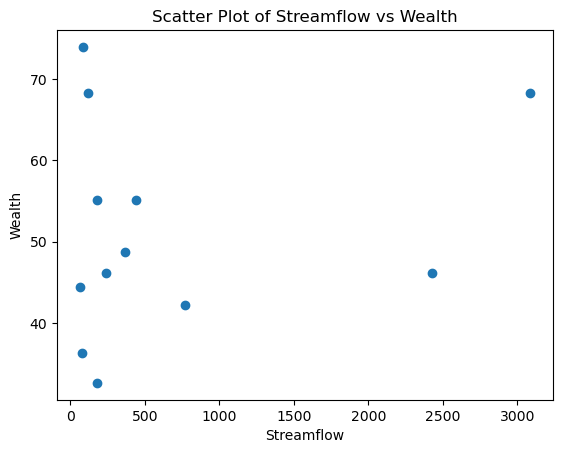

In [60]:
plt.scatter(big_df['Streamflow'], big_df['Wealth'])
plt.title('Scatter Plot of Streamflow vs Wealth')
plt.xlabel('Streamflow')
plt.ylabel('Wealth')
plt.show()

# Streamflow vs Wealth corrcoef Single

In [61]:
corrcoeff_wth_strmflw = np.corrcoef(big_df['Streamflow'], big_df['Wealth'])[0, 1]
corrcoeff_wth_strmflw

0.2142088998636273